# Kernel tests

with skimage and opencv

## creating random 0 and 1 matrix

### imports

In [12]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import skimage.io
import skimage.filters
%matplotlib widget


### Matrix

In [76]:
random_matrix = [0]*9500 + [1]*500

random.shuffle(random_matrix)
np_matrix = np.array(random_matrix)

shaped_matrix = np_matrix.reshape(100,100)

In [77]:
shaped_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

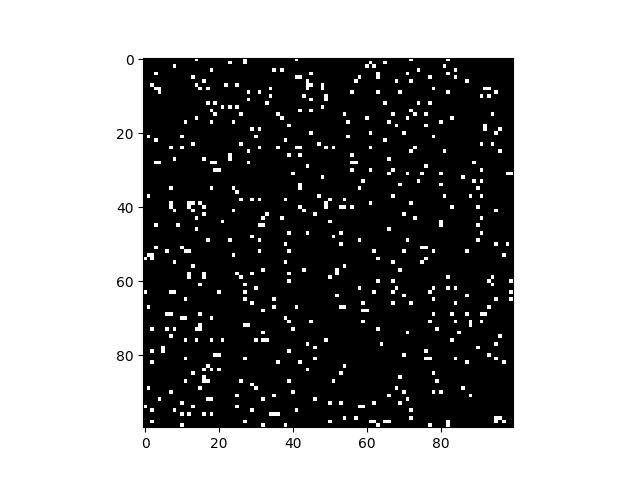

In [78]:
plt.figure()
plt.imshow(shaped_matrix, cmap='gray')

## Blurred image

In [284]:
sigma = 2.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    shaped_matrix, sigma=(sigma, sigma), truncate=3.5, multichannel=True)


/tmp/ipykernel_1972/999261412.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  blurred = skimage.filters.gaussian(


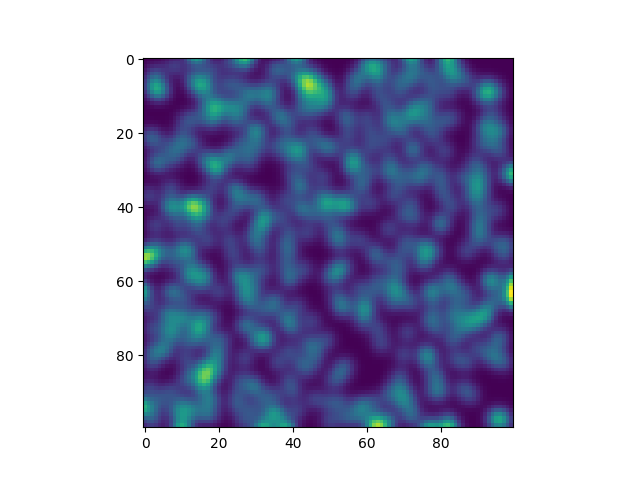

In [286]:
# display blurred image
plt.figure()
plt.imshow(blurred)
# plt.show()

## Padding

In [287]:
padded_image_0 = np.pad(
        shaped_matrix, 10,
        #np.ceil((((np.hypot(*shaped_matrix.shape)) - shaped_matrix.shape)) / 2).astype(int),
        mode='constant',
        constant_values=0)

padded_image_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

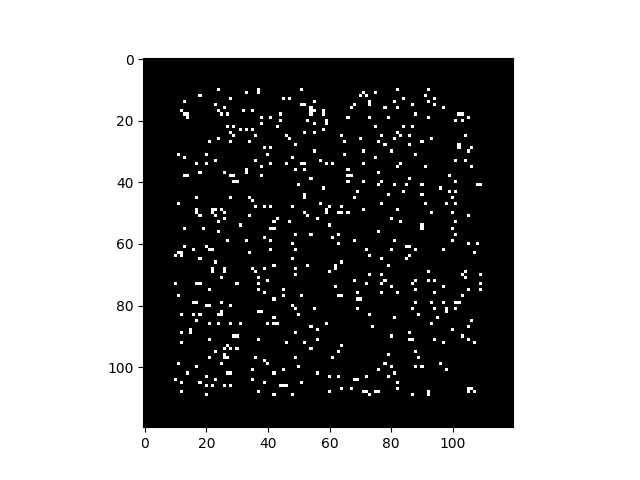

In [288]:
plt.figure()
plt.imshow(padded_image_0, cmap='gray')
# plt.show()

In [289]:
padded_image_nan = np.pad(
        shaped_matrix, 10,
        #np.ceil((((np.hypot(*shaped_matrix.shape)) - shaped_matrix.shape)) / 2).astype(int),
        mode='constant',
        constant_values= -1)

padded_image_nan = padded_image.astype('float')

padded_image_nan[padded_image_nan == -1] = np.nan
padded_image_nan.shape

(120, 120)

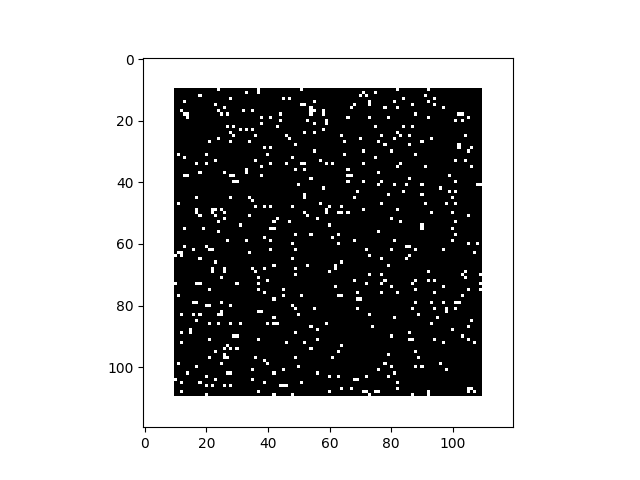

In [290]:
plt.figure()
plt.imshow(padded_image, cmap='gray')
# plt.show()

## blurring padded image with skimage

comparison between skimage and opencv filter

gau_img = cv2.GaussianBlur(img, (5,5), 10.0) # 5*5 kernel, 2 on each side. 2 = 1/5 * 10 = 1/5 * sigma
gau_img = skimage.filters.gaussian(img, sigma=10, truncate=1/5)

In [291]:
1/5 * 10 

2.0

/tmp/ipykernel_1972/3190558771.py:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  blurred_pad = skimage.filters.gaussian(


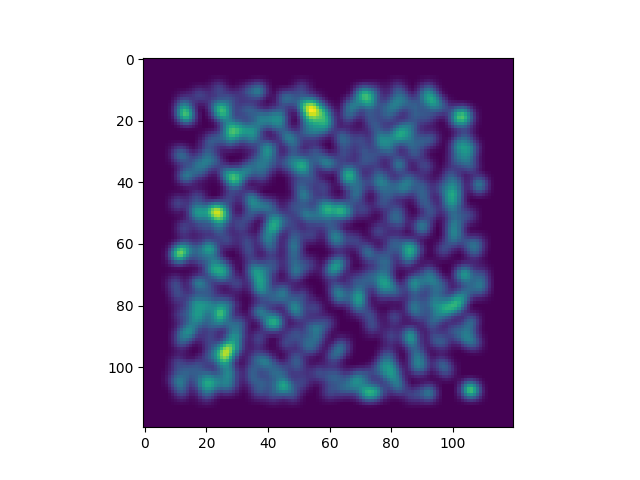

In [292]:
sigma = 2
# apply Gaussian blur, creating a new image
truncate = sigma*1

blurred_pad = skimage.filters.gaussian(
    padded_image_0, sigma=(sigma, sigma), truncate= truncate, multichannel=True)

plt.figure()
plt.imshow(blurred_pad)


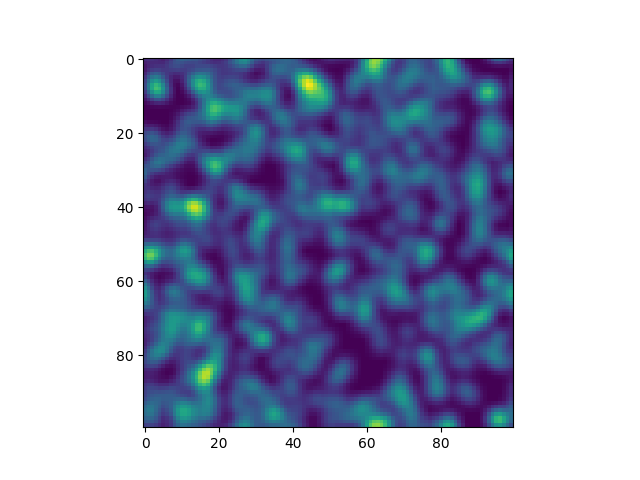

In [293]:
sigma = 2
# apply Gaussian blur, creating a new image
truncate = sigma*1

blurred_pad = skimage.filters.gaussian(
    shaped_matrix, sigma=(sigma, sigma), truncate= truncate, mode='wrap')

plt.figure()
plt.imshow(blurred_pad)


## blurring padded image with open-cv

In [249]:
from cv2 import GaussianBlur
from cv2 import BORDER_TRANSPARENT
from cv2 import BORDER_REFLECT_101


kernel_size = 7
sigma = 1

blurred_cv2 = GaussianBlur(shaped_matrix, #input array
                           #dst, outpu array
                           (kernel_size,kernel_size),
                           sigmaX = sigma, #sigmaX
                           sigmaY = sigma,
                           # 0, sigmay default,
#                            borderType = BORDER_REFLECT_101  #type of border
                          )


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/filter.simd.hpp:3043: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=4), and buffer format (=5) in function 'getLinearRowFilter'


In [235]:
blurred_cv2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

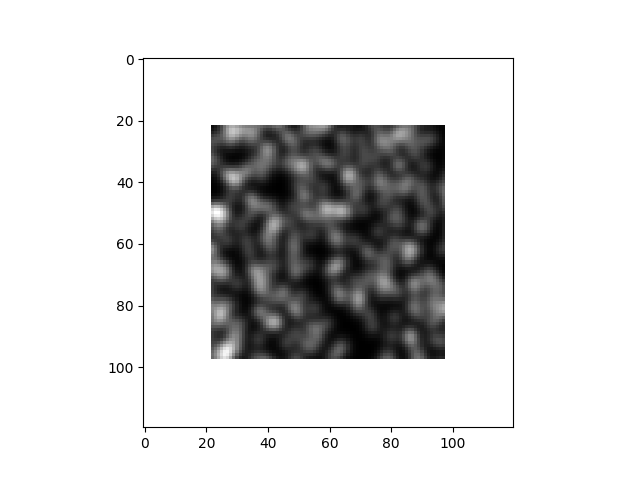

In [225]:
plt.figure()
plt.imshow(blurred_cv2, cmap='gray')

## Standarizing with minmaxscaler 

In [138]:
x, y = blurred_pad.shape
y

120

In [156]:
from sklearn.preprocessing import normalize

#not working with Nans

# scaled = normalize(blurred_pad.reshape(120*120,1), norm='max', axis=0).reshape(120,120)
# scaled

In [157]:
from sklearn.preprocessing import MinMaxScaler

x, y = blurred_pad.shape

scaler = MinMaxScaler(feature_range=(0, 1))
scaled =scaler.fit_transform(blurred_pad.reshape(x*y,1)).reshape(x,y)


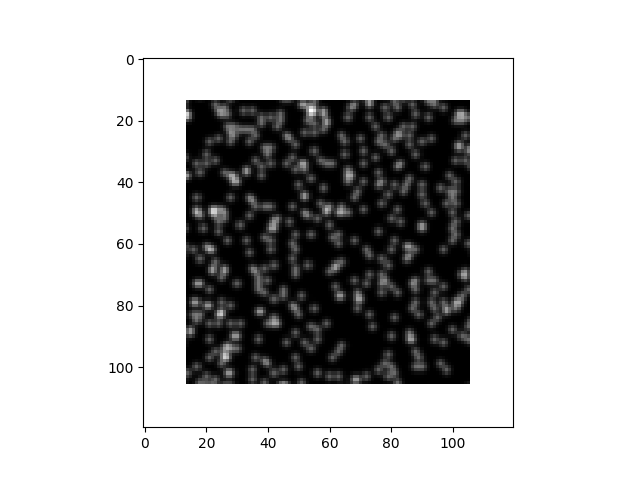

In [158]:
plt.figure()

plt.imshow(scaled, cmap='gray')

In [137]:
scaled.max()

1.0

In [121]:
scaled.min()

0.0

## muplying (scaled channel)

In [42]:
padded_multiplied = padded_image * 255

padded_multiplied.max()

blurred_multiplied = skimage.filters.gaussian(
    padded_multiplied, sigma=(sigma, sigma), truncate=3.5, multichannel=True)

plt.figure()
plt.imshow(blurred_multiplied)


In [47]:
blurred_multiplied.max()

3.8114952809012344e-18

## Aplying histogram tools from skimage

extracted from 
https://scikit-image.org/docs/stable/auto_examples/index.html

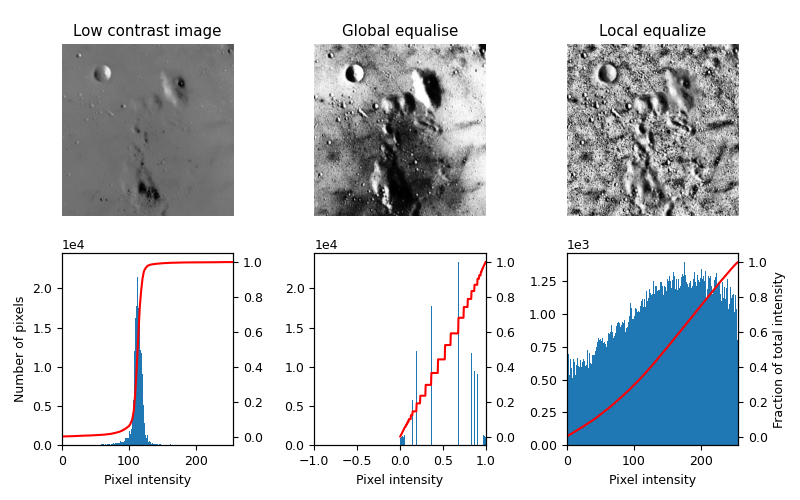

In [49]:
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


plt.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

/tmp/ipykernel_31347/3868606676.py:47: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img_eq = rank.equalize(img, footprint=footprint)


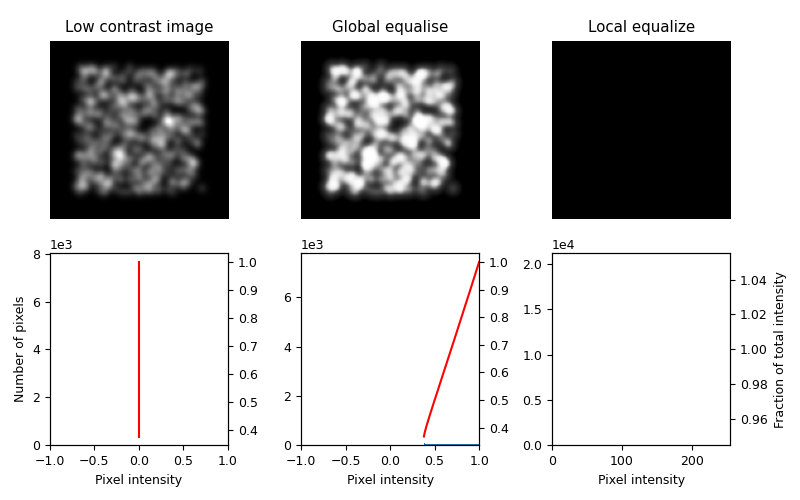

In [50]:
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


plt.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = blurred_multiplied

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

#  testing with grid

In [302]:
# Break grid in rows. First as if feature is in row

df_grid = pd.read_csv('../livablestreets/data/Berlin_grid_100m.csv')

lat_start_limits = df_grid['lat_start'].unique()
lng_start_limits = df_grid['lng_end'].unique()

# for lats_index in range(5,7):#range(len(lat_start_limits)):
#     df_grid = df_grid[df_grid['lat']>=lat_start_limits[lats_index]]
#     df_grid = df_grid[df_grid['lat']<lat_end_limits[lats_index]]
    
# print(df_grid)

In [303]:
len(lat_start_limits)

374

In [304]:
len(lng_start_limits)

359

In [308]:
df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134266 entries, 0 to 134265
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lat_start            134266 non-null  float64
 1   lat_end              134266 non-null  float64
 2   lng_start            134266 non-null  float64
 3   lng_end              134266 non-null  float64
 4   lat_center           134266 non-null  float64
 5   lng_center           134266 non-null  float64
 6   km_to_centroid       134266 non-null  float64
 7   grid_in_berlin       134266 non-null  bool   
 8   degrees_to_centroid  134266 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 8.3 MB


In [309]:
len(lat_start_limits)*len(lng_start_limits)

134266

In [310]:
df_grid

,lat_start,lat_end,lng_start,lng_end,lat_center,lng_center,km_to_centroid,grid_in_berlin,degrees_to_centroid
0,52.673946,52.674846,13.088348,13.090219,52.674396,13.089283,28.580351,False,151.086018
1,52.673946,52.674846,13.090219,13.092089,52.674396,13.091154,28.486979,False,150.940452
2,52.673946,52.674846,13.092089,13.093960,52.674396,13.093024,28.393863,False,150.793543
3,52.673946,52.674846,13.093960,13.095830,52.674396,13.094895,28.301005,False,150.645274
4,52.673946,52.674846,13.095830,13.097701,52.674396,13.096765,28.208406,False,150.495627
...,...,...,...,...,...,...,...,...,...
134261,52.338246,52.339146,13.750511,13.752381,52.338696,13.751446,29.803319,False,335.000641
134262,52.338246,52.339146,13.752381,13.754252,52.338696,13.753317,29.904185,False,335.117700
134263,52.338246,52.339146,13.754252,13.756122,52.338696,13.755187,30.005250,False,335.233737
134264,52.338246,52.339146,13.756122,13.757993,52.338696,13.757058,30.106509,False,335.348764


In [ ]:
matrix_1Dgrid = df_grid.to_numpy()
n_columns = len(df_grid.columns())

In [ ]:
matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)

In [ ]:
matrix_2Dgrid.shape()